In [1]:
import nltk
from nltk import tokenize
from nltk import FreqDist
from wordcloud import WordCloud
import string
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from unidecode import unidecode

In [2]:
#nltk.download()

In [3]:
discurso = open('discurso-bolsonaro-parlatorio.txt', mode='r', encoding='utf-8').read().lower()
discurso = unidecode(discurso.replace('\n', ' '))

In [4]:
# Removendo pontuação
discurso_sem_pontuacao = ''.join([palavra for palavra in discurso if palavra not in string.punctuation])


In [5]:
# Isolando cada palavra
separar_palavras = tokenize.word_tokenize(discurso_sem_pontuacao, language='portuguese')

In [6]:
# Removendo palavras que se removidas não alteram o sentido das frases
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
palavras_sem_stop = [palavra for palavra in separar_palavras if palavra not in stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\caim_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
freq = FreqDist(palavras_sem_stop)
freq = freq.most_common(30)
freq

[('brasil', 10),
 ('vamos', 9),
 ('deus', 7),
 ('voces', 5),
 ('todos', 5),
 ('nacao', 5),
 ('governo', 5),
 ('nao', 4),
 ('povo', 4),
 ('toda', 4),
 ('dia', 4),
 ('pais', 4),
 ('brasileiros', 4),
 ('juntos', 3),
 ('lugar', 3),
 ('grande', 3),
 ('familias', 3),
 ('tudo', 3),
 ('sera', 3),
 ('so', 2),
 ('vida', 2),
 ('mim', 2),
 ('mundo', 2),
 ('prosperidade', 2),
 ('neste', 2),
 ('libertar', 2),
 ('valores', 2),
 ('voz', 2),
 ('vez', 2),
 ('direito', 2)]

In [8]:
# adicionando mais alguns filtros
stopwords.extend(['nacional', 'brasil', 'senhoras', 'senhores', '-', 
'todos', 'todas', 'governo', 'brasileiro', 'brasileira',
'brasileiros', 'brasileiras', 'pais', 'política', 'nao'])

In [9]:
palavras_sem_stop = [palavra for palavra in separar_palavras if palavra not in stopwords]
freq = FreqDist(palavras_sem_stop)
top30 = freq.most_common(30)

top30

[('vamos', 9),
 ('deus', 7),
 ('voces', 5),
 ('nacao', 5),
 ('povo', 4),
 ('toda', 4),
 ('dia', 4),
 ('juntos', 3),
 ('lugar', 3),
 ('grande', 3),
 ('familias', 3),
 ('tudo', 3),
 ('sera', 3),
 ('so', 2),
 ('vida', 2),
 ('mim', 2),
 ('mundo', 2),
 ('prosperidade', 2),
 ('neste', 2),
 ('libertar', 2),
 ('valores', 2),
 ('voz', 2),
 ('vez', 2),
 ('direito', 2),
 ('partir', 2),
 ('hoje', 2),
 ('faremos', 2),
 ('gracas', 2),
 ('desafios', 2),
 ('podemos', 2)]

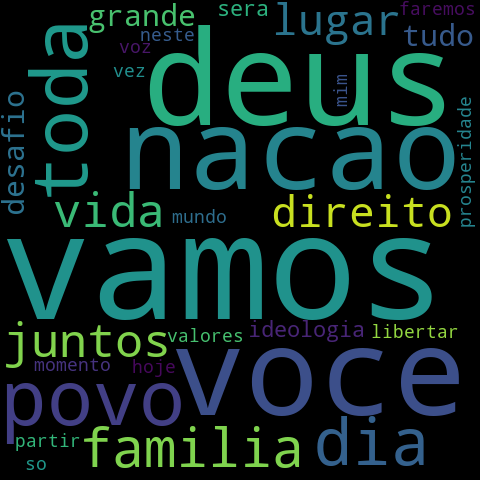

In [10]:
nuvem_de_palavras = WordCloud(stopwords=stopwords,
                              height=480,
                              width=480,
                              max_words=30)
nuvem_de_palavras.generate(discurso_sem_pontuacao)
nuvem_de_palavras.to_file('nuvem.png')
Image.open('nuvem.png')

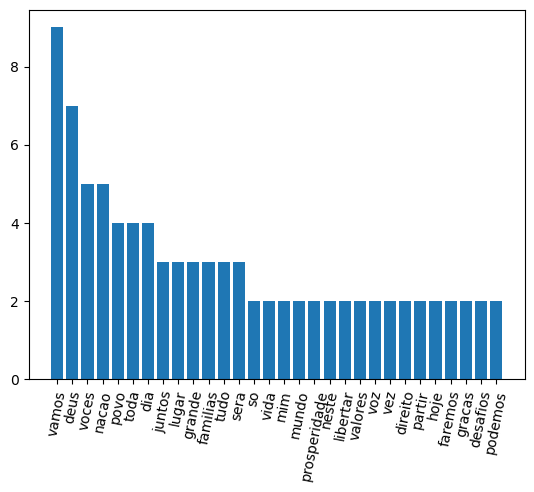

In [11]:
top30 = dict(top30)
df = pd.DataFrame.from_dict(top30.items())
df = df.rename(columns={0:'Palavras', 1:'Repetições'})

plt.bar(df['Palavras'], df['Repetições'])
plt.xticks(rotation=79)
plt.show()



In [12]:
# Passarei uma lista de palavras específicas para ver a quantidade de vezes que foi citada:
analise_palavras = [
    'ambiente',
    'natureza', 
    'fome', 
    'amazonia',
    'educacao',
    'saude',
    'orcamento' 
]


freq = dict(freq)


for palavra in analise_palavras:
    try:
        if freq[palavra]:
            print(f'{palavra}: {freq[palavra]}')
    except:
        print(f'{palavra}: 0')

ambiente: 0
natureza: 0
fome: 0
amazonia: 0
educacao: 2
saude: 1
orcamento: 0


#### Daqui pra baixo tento fazer análise de palavras a partir do radical

In [13]:
analise_palavras = [
    'ambient',
    'natur', 
    'amazoni',
    'educa',
    'saud',
    'democra' 
]

contagem_com_radicais = {}
for palavra in analise_palavras:  
    if palavra in discurso_sem_pontuacao:
        contagem_com_radicais[palavra] = discurso_sem_pontuacao.count(palavra)
    else:
        contagem_com_radicais[palavra] = 0


df = pd.DataFrame(contagem_com_radicais.items(), columns=['radical', 'frequencia'])
df.sort_values(by=['frequencia'], ascending=False).style.hide(axis='index')

radical,frequencia
educa,2
democra,2
saud,1
ambient,0
natur,0
amazoni,0
